# 🏡 Airbnb Market Analysis & Optimization  
### 📊 Data-Driven Insights for Hosts & Investors  

The short-term rental market is **highly competitive**, and standing out requires **smart, data-driven decisions**.  
This notebook explores **real-world Airbnb data** to **identify market gaps, optimize listings, and maximize revenue** for both **existing hosts and new investors**.  

---

## 🎯 **Objective of This Analysis**  
✔ **For Existing Hosts:** Learn how to **optimize listings** to get more bookings & revenue.  
✔ **For New Investors:** Discover **profitable property types, amenities, and pricing strategies**. 

---

## 🔍 **What We Will Explore?**  
✅ **Market Trends** – Where is the best place to invest? Which cities have high/low competition?  
✅ **Guest Preferences** – What property & room types receive the highest ratings?  
✅ **Pricing Strategies** – What’s the best price range to attract more bookings?  
✅ **Amenities Impact** – Which amenities increase guest satisfaction & revenue?  
✅ **Superhost Advantage** – Do Superhosts actually get better ratings and bookings?  

📌 **Let’s dive into the data and uncover what makes an Airbnb listing successful!** 🚀  
__________

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### First we'll clean the data in each file before heading towards `EDA`

In [3]:
dp = pd.read_csv('Detailed_Property.csv')

In [4]:
dp.head(3)

,title,propertyType,location,personCapacity,descriptionLanguage,listingLat,listingLng,homeTier,roomType,visibleReviewCount,valueRating,locationRating,communicationRating,checkinRating,accuracyRating,cleanlinessRating,guestSatisfactionOverall,productCountry,property_id,bookingData.allowsChildren,bookingData.allowsInfants,bookingData.allowsPets,bookingData.hostId,bookingData.hostName,bookingData.hostProfilePhotoUrl,bookingData.isHotelRatePlanEnabled,bookingData.isSuperhost,bookingData.maxNights,bookingData.minNights,bookingData.reviewsCount,bookingData.reviewsRating,bookingData.roomAndPropertyType,bookingData.barPrice,bookingData.chinaDiscountModalData,bookingData.canInstantBook,bookingData.price,bookingData.cancellationPolicies,bookingData.structuredDisplayPrice,bookingData.productItemDetail,sections.bookIt.available,sections.bookIt.title,sections.bookIt.cancellationPolicyLoggingEventData,sections.bookIt.calendarTitle,sections.bookIt.calendarSubtitle,sections.bookIt.descriptionItems,sections.bookIt.discountCopy,sections.bookIt.maxGuestCapacity,sections.bookIt.barPrice,sections.bookIt.bookItButtonByPlacement,sections.bookIt.reviewItem.accessibilityLabel,sections.bookIt.reviewItem.title,sections.bookIt.structuredDisplayPrice,sections.bookIt.selectedDatesLink,sections.bookIt.selectedNights,sections.bookIt.productId,sections.education.pdpEducationContentData,sections.availabilityCalendarDefault.title,sections.availabilityCalendarDefault.subtitle,sections.availabilityCalendarDefault.priceDisclaimer,sections.availabilityCalendarDefault.reviewRating,sections.availabilityCalendarDefault.reviewCount,sections.availabilityCalendarDefault.reviewAccessibilityLabel,sections.availabilityCalendarDefault.descriptionItems,sections.petCounts.title,sections.petCounts.titleStyle,sections.petCounts.html.htmlText,sections.petCounts.html.recommendedNumberOfLines,sections.petCounts.icon,sections.petCounts.mediaItem.baseUrl,sections.petCounts.subtitle,sections.description.title,sections.description.subtitle,sections.description.items,sections.description.logoData,sections.description.mediaItems,sections.hero.mediaItems,sections.hero.previewImages,sections.hero.seePhotosButton.accessibilityLabel,sections.hero.seePhotosButton.icon,sections.hero.seePhotosButton.title,sections.hero.seePhotosButton.subtitle,sections.hero.previewImageLoggingEventData.loggingId,sections.hero.previewImageLoggingEventData.component,sections.hero.previewImageLoggingEventData.section,sections.hero.previewImageLoggingEventData.eventData,sections.hero.previewImageLoggingEventData.eventDataSchemaName,sections.title.billboardButton,sections.title.kicker,sections.title.kickerItems,sections.title.actionableIcon,sections.title.icon,sections.title.title,sections.title.overviewItems,sections.title.subtitle,sections.highlights.title,sections.highlights.highlights,sections.descriptionDefault.descriptionSummary.htmlText,sections.descriptionDefault.descriptionSummary.minimumNumberOfLinesForTruncation,sections.descriptionDefault.descriptionSummary.recommendedNumberOfLines,sections.descriptionDefault.hasExtraDescriptionDetails,sections.descriptionDefault.htmlDescription,sections.descriptionDefault.hostQuote,sections.descriptionDefault.title,sections.amenities.title,sections.amenities.previewAmenitiesGroups,sections.amenities.seeAllAmenitiesGroups,sections.amenities.seeAllAmenitiesButton.accessibilityLabel,sections.amenities.seeAllAmenitiesButton.icon,sections.amenities.seeAllAmenitiesButton.title,sections.amenities.seeAllAmenitiesButton.subtitle,sections.location.address,sections.location.homeIcon,sections.location.hostGuidebookButton,sections.location.lat,sections.location.lng,sections.location.locationDisclaimer,sections.location.locationDisclaimerItems,sections.location.previewLocationDetails,sections.location.seeAllDetailsButton,sections.location.seeAllLocationDetails,sections.location.subtitle,sections.location.title,sections.location.mapMarkerRadiusInMeters,sections.reviewsDefault.title,se

In [5]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 172 entries, title to sections.title.actionableIcon.subtitle
dtypes: bool(4), float64(89), int64(10), object(69)
memory usage: 651.7+ KB


In [6]:
dp.shape

(495, 172)

In [7]:
# find missing values columns in descending order
missing_values = dp.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(dp)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)



                                                    Missing Values  Percentage
sections.title.billboardButton                                 495  100.000000
sections.title.kicker                                          495  100.000000
sections.amenities.seeAllAmenitiesButton.subtitle              495  100.000000
sections.amenities.seeAllAmenitiesButton.icon                  495  100.000000
sections.amenities.seeAllAmenitiesButton.access...             495  100.000000
sections.descriptionDefault.hostQuote                          495  100.000000
sections.descriptionDefault.htmlDescription                    495  100.000000
sections.highlights.title                                      495  100.000000
sections.title.subtitle                                        495  100.000000
sections.title.overviewItems                                   495  100.000000
sections.title.icon                                            495  100.000000
sections.title.actionableIcon                       

#### we'll drop columns with more than 35% missing values

In [8]:
dp = dp.dropna(thresh=0.65 * len(dp), axis=1)
dp.shape

(495, 88)

In [9]:
dp.head(3)

,title,propertyType,location,personCapacity,descriptionLanguage,listingLat,listingLng,homeTier,roomType,visibleReviewCount,valueRating,locationRating,communicationRating,checkinRating,accuracyRating,cleanlinessRating,guestSatisfactionOverall,productCountry,property_id,bookingData.allowsPets,bookingData.hostId,bookingData.hostName,bookingData.hostProfilePhotoUrl,bookingData.isHotelRatePlanEnabled,bookingData.isSuperhost,bookingData.maxNights,bookingData.minNights,bookingData.reviewsCount,bookingData.reviewsRating,bookingData.roomAndPropertyType,bookingData.canInstantBook,bookingData.cancellationPolicies,sections.bookIt.reviewItem.accessibilityLabel,sections.bookIt.reviewItem.title,sections.availabilityCalendarDefault.title,sections.availabilityCalendarDefault.subtitle,sections.availabilityCalendarDefault.priceDisclaimer,sections.availabilityCalendarDefault.reviewRating,sections.availabilityCalendarDefault.reviewCount,sections.availabilityCalendarDefault.reviewAccessibilityLabel,sections.availabilityCalendarDefault.descriptionItems,sections.petCounts.title,sections.petCounts.html.htmlText,sections.petCounts.mediaItem.baseUrl,sections.description.title,sections.description.items,sections.hero.previewImages,sections.hero.seePhotosButton.title,sections.hero.previewImageLoggingEventData.loggingId,sections.hero.previewImageLoggingEventData.component,sections.hero.previewImageLoggingEventData.section,sections.title.title,sections.highlights.highlights,sections.descriptionDefault.descriptionSummary.htmlText,sections.descriptionDefault.descriptionSummary.minimumNumberOfLinesForTruncation,sections.descriptionDefault.descriptionSummary.recommendedNumberOfLines,sections.descriptionDefault.hasExtraDescriptionDetails,sections.amenities.title,sections.amenities.previewAmenitiesGroups,sections.amenities.seeAllAmenitiesGroups,sections.amenities.seeAllAmenitiesButton.title,sections.location.homeIcon,sections.location.lat,sections.location.lng,sections.location.previewLocationDetails,sections.location.seeAllLocationDetails,sections.location.subtitle,sections.location.title,sections.location.mapMarkerRadiusInMeters,sections.reviewsDefault.heading.accessibilityLabel,sections.reviewsDefault.heading.icon,sections.reviewsDefault.heading.title,sections.reviewsDefault.ratings,sections.policies.cancellationPolicies,sections.policies.cancellationPolicyTitle,sections.policies.houseRules,sections.policies.houseRulesTitle,sections.policies.seeAllHouseRulesButton.accessibilityLabel,sections.policies.seeAllHouseRulesButton.title,sections.policies.seeCancellationPolicyButton.accessibilityLabel,sections.policies.seeCancellationPolicyButton.title,sections.policies.title,sections.policies.safetyAndPropertyTitle,sections.policies.previewSafetyAndProperties,sections.policies.seeAllSafetyAndPropertyButton.accessibilityLabel,sections.policies.seeAllSafetyAndPropertyButton.title,sections.photoTour.title,sections.photoTour.mediaItems
0,Home in Calgary · ★4.95 · 1 bedroom · 1 bed · ...,Entire home,Calgary,2,en,51.055354,-114.028776,1,Entire home/apt,21.0,5.00,5.00,5.00,5.00,5.00,5.00,4.95,CA,1143371712266502884,False,38955414,Haley,https://a0.muscache.com/im/pictures/user/User/...,False,True,30,1,21,4.95,Entire home,True,"[{'cancellationPolicyId': 3, 'milestones': [],...",Rated 4.95 out of 5 from 21 reviews.,4.95,Availability,Add your travel dates for exact pricing,Prices on calendar do not include taxes and fees,4.95,21.0,Rated 4.95 out of 5 from 21 reviews.,"[{'title': 'Entire home'}, {'title': '1 bed'},...",Service animals,"Service animals aren’t pets, so there’s no nee...",https://a0.muscache.com/pictures/adafb11b-41e9...,About this space,"[{'title': None, 'subtitle': None, 'media': No...",[{'accessibilityLabel': 'Cute Inner City Haven...,Show all photos,pdp.hero.image,image,hero,Cute Inner City Haven with Country-like Serenity,"[{'icon': 'SYSTEM_GOLDEN_TROPHY', 'title': 'To...","Welcome to our unique home, offering country s...",9,6,True,What this place offers,[{'id

In [10]:
# remaining columns with missing values
dp.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

sections.photoTour.title                                         119
sections.reviewsDefault.heading.icon                              69
sections.reviewsDefault.ratings                                   69
sections.bookIt.reviewItem.accessibilityLabel                     59
checkinRating                                                     40
accuracyRating                                                    40
cleanlinessRating                                                 40
guestSatisfactionOverall                                          40
valueRating                                                       40
sections.availabilityCalendarDefault.reviewRating                 40
sections.availabilityCalendarDefault.reviewCount                  40
sections.availabilityCalendarDefault.reviewAccessibilityLabel     40
sections.reviewsDefault.heading.accessibilityLabel                40
communicationRating                                               40
sections.reviewsDefault.heading.ti

In [11]:
missing_dp = dp.loc[:, dp.isnull().sum() > 0]
missing_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   visibleReviewCount                                             455 non-null    float64
 1   valueRating                                                    455 non-null    float64
 2   locationRating                                                 455 non-null    float64
 3   communicationRating                                            455 non-null    float64
 4   checkinRating                                                  455 non-null    float64
 5   accuracyRating                                                 455 non-null    float64
 6   cleanlinessRating                                              455 non-null    float64
 7   guestSatisfactionOverall                                      

In [12]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid modifying the original
dp_encoded = dp.copy()

# Encode categorical (object) columns in missing_dp
for col in missing_dp.select_dtypes(include=['object']).columns:
    dp_encoded[col] = LabelEncoder().fit_transform(dp_encoded[col].astype(str))  # Convert to string before encoding

# Compute correlation of missing columns with all other columns in dp
correlation_matrix = dp_encoded.corr().loc[missing_dp.columns, :]

# Remove self-correlations
correlation_matrix = correlation_matrix.drop(columns=missing_dp.columns)

# Get the highest correlation values and corresponding column names
highest_correlation_values = correlation_matrix.abs().max(axis=1)
highest_correlation_columns = correlation_matrix.abs().idxmax(axis=1)

# Combine results into a DataFrame
correlation_results = pd.DataFrame({
    'Highest Correlation': highest_correlation_values,
    'With Column': highest_correlation_columns
}).sort_values(by='Highest Correlation', ascending=False)

correlation_results


C:\Users\Muhammad_Samar\AppData\Local\Temp\ipykernel_11096\1859825008.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dp_encoded.corr().loc[missing_dp.columns, :]


,Highest Correlation,With Column
visibleReviewCount,1.000000,bookingData.reviewsCount
guestSatisfactionOverall,1.000000,bookingData.reviewsRating
sections.availabilityCalendarDefault.reviewRating,1.000000,bookingData.reviewsRating
sections.availabilityCalendarDefault.reviewCount,1.000000,bookingData.reviewsCount
cleanlinessRating,0.818991,bookingData.reviewsRating
valueRating,0.808578,bookingData.reviewsRating
accuracyRating,0.768105,bookingData.reviewsRating
sections.reviewsDefault.heading.icon,0.723070,bookingData.reviewsRating
communicationRating,0.692820,bookingData.reviewsRating
checkinRating,0.605221,bookingData.reviewsRating


In [13]:
# Check correlation among highly correlated columns and all dp columns
correlation_check = dp_encoded.corr().loc[['visibleReviewCount', 'guestSatisfactionOverall', 'sections.availabilityCalendarDefault.reviewRating']]
correlation_check

C:\Users\Muhammad_Samar\AppData\Local\Temp\ipykernel_11096\1558420298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_check = dp_encoded.corr().loc[['visibleReviewCount', 'guestSatisfactionOverall', 'sections.availabilityCalendarDefault.reviewRating']]


,personCapacity,listingLat,listingLng,homeTier,visibleReviewCount,valueRating,locationRating,communicationRating,checkinRating,accuracyRating,cleanlinessRating,guestSatisfactionOverall,property_id,bookingData.allowsPets,bookingData.hostId,bookingData.isHotelRatePlanEnabled,bookingData.isSuperhost,bookingData.maxNights,bookingData.minNights,bookingData.reviewsCount,bookingData.reviewsRating,bookingData.canInstantBook,sections.bookIt.reviewItem.accessibilityLabel,sections.bookIt.reviewItem.title,sections.availabilityCalendarDefault.reviewRating,sections.availabilityCalendarDefault.reviewCount,sections.availabilityCalendarDefault.reviewAccessibilityLabel,sections.descriptionDefault.descriptionSummary.minimumNumberOfLinesForTruncation,sections.descriptionDefault.descriptionSummary.recommendedNumberOfLines,sections.descriptionDefault.hasExtraDescriptionDetails,sections.location.lat,sections.location.lng,sections.location.mapMarkerRadiusInMeters,sections.reviewsDefault.heading.accessibilityLabel,sections.reviewsDefault.heading.icon,sections.reviewsDefault.heading.title,sections.reviewsDefault.ratings,sections.photoTour.title
visibleReviewCount,0.057098,0.015321,-0.048932,NaN,1.000000,-0.051671,-0.156255,-0.100881,-0.079018,-0.050272,-0.153182,-0.111994,-0.705207,-0.213526,-0.286218,NaN,0.132990,0.149223,-0.089222,1.000000,-0.111994,-0.133335,-0.178161,-0.165543,-0.111994,1.000000,-0.217793,NaN,NaN,NaN,0.015413,-0.048988,0.050693,-0.067985,-0.214616,0.099980,-0.284553,0.090259
guestSatisfactionOverall,-0.026406,-0.064334,-0.072489,NaN,-0.111994,0.808578,0.591636,0.692820,0.605221,0.768105,0.818991,1.000000,0.142638,0.051957,-0.075039,NaN,0.301071,-0.105447,0.117810,-0.111994,1.000000,0.028963,0.781831,0.938738,1.000000,-0.111994,0.906447,NaN,NaN,NaN,-0.064345,-0.072501,0.073456,0.703943,0.187692,0.567459,0.740799,-0.065025
sections.availabilityCalendarDefault.reviewRating,-0.026406,-0.064334,-0.072489,NaN,-0.111994,0.808578,0.591636,0.692820,0.605221,0.768105,0.818991,1.000000,0.142638,0.051957,-0.075039,NaN,0.301071,-0.105447,0.117810,-0.111994,1.000000,0.028963,0.781831,0.938738,1.000000,-0.111994,0.906447,NaN,NaN,NaN,-0.064345,-0.072501,0.073456,0.703943,0.187692,0.567459,0.740799,-0.065025


- We'll use RF for `visibleReviewCount`, `guestSatisfactionOverall`, `sections.availabilityCalendarDefault.reviewRating	`
- we'll use basic techniques mean, median, mode for other colums.

#### Filling remaining cols with basic techniques `mean, median, mode`

In [14]:
# Exclude the 3 target columns from filling
exclude_cols = ['visibleReviewCount', 'guestSatisfactionOverall', 'sections.availabilityCalendarDefault.reviewRating']

# Fill numerical columns (except excluded ones) with mean
num_cols = dp.select_dtypes(include=['float64']).columns.drop(exclude_cols)
dp[num_cols] = dp[num_cols].apply(lambda x: x.fillna(x.mean()) if x.isnull().sum() > 0 else x)

# Fill categorical columns with mode
cat_cols = dp.select_dtypes(include=['object', 'bool']).columns
dp[cat_cols] = dp[cat_cols].apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().sum() > 0 else x)

print("Missing values filled in dp successfully!")

Missing values filled in dp successfully!


In [15]:
dp.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

visibleReviewCount                                   40
guestSatisfactionOverall                             40
sections.availabilityCalendarDefault.reviewRating    40
dtype: int64

#### Now we'll fill these 3 cols using RF

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
dp_encoded = dp.copy()  # Work on a copy to avoid modifying the original
categorical_features = dp_encoded.select_dtypes(include=['object', 'category']).columns
le_objects = {}

for col in categorical_features:
    col_le = LabelEncoder()
    dp_encoded[col] = col_le.fit_transform(dp_encoded[col].astype(str))  # Convert to string to handle NaNs
    le_objects[col] = col_le  # Store encoder for reverse transformation

# Function to impute missing values with RF while dropping specific columns
def impute_missing(target_col, drop_cols):
    temp = dp_encoded.copy()
    temp.drop(columns=drop_cols, inplace=True)

    missing_dp = temp[temp[target_col].isnull()]
    without_missing_dp = temp.dropna()

    if missing_dp.empty or without_missing_dp.empty:
        return

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(without_missing_dp.drop(columns=[target_col]), without_missing_dp[target_col])

    y_pred = rf.predict(missing_dp.drop(columns=[target_col]))
    dp_encoded.loc[dp_encoded[target_col].isnull(), target_col] = y_pred  # Fill in encoded dp

# Impute missing values step by step
impute_missing('visibleReviewCount', ['guestSatisfactionOverall', 'sections.availabilityCalendarDefault.reviewRating'])
impute_missing('guestSatisfactionOverall', ['sections.availabilityCalendarDefault.reviewRating'])
impute_missing('sections.availabilityCalendarDefault.reviewRating', [])

# Reverse Encoding: Convert numeric labels back to original categories
for col, encoder in le_objects.items():
    dp_encoded[col] = encoder.inverse_transform(dp_encoded[col].astype(int))

# Update original dp with reverse-encoded values
dp.update(dp_encoded)

In [17]:
dp.isnull().sum().sort_values(ascending=False)

title                                                                               0
propertyType                                                                        0
sections.location.previewLocationDetails                                            0
sections.location.lng                                                               0
sections.location.lat                                                               0
sections.location.homeIcon                                                          0
sections.amenities.seeAllAmenitiesButton.title                                      0
sections.amenities.seeAllAmenitiesGroups                                            0
sections.amenities.previewAmenitiesGroups                                           0
sections.amenities.title                                                            0
sections.descriptionDefault.hasExtraDescriptionDetails                              0
sections.descriptionDefault.descriptionSummary.recomme

### All missing values filled in `**Detailed_Property**` file

__________________

In [18]:
pbp = pd.read_csv('property_by_place.csv')

In [19]:
pbp.head(3)

,Unnamed: 0.1,Unnamed: 0,avgRating,listingBathroomLabel,bathrooms,listingBedLabel,bedrooms,beds,businessHostLabel,city,listingGuestLabel,id,isAutoTranslated,isNewListing,isSuperhost,relaxedFilterLabels,localizedCityName,localizedDistanceText,locationTitle,locationContext,listingName,listingObjType,neighborhood,previewTags,publicAddress,reviewsCount,roomType,roomTypeCategory,roomTypeId,spaceType,starRating,title,avgRatingLocalized,accessibilityLabel,price,qualifier,adults,children,infants,pets
0,0,0,4.95,1 bath,1.0,1 bed,1,1,NaN,Calgary,2 guests,1143371712266502884,False,False,True,NaN,Calgary,NaN,NaN,NaN,Cute Inner City Haven with Country-like Serenity,REGULAR,NaN,[],"Calgary, AB, Canada",20,Entire home/apt,entire_home,NaN,Home,5.0,Home in Northeast Calgary,4.95 (20),$90 CAD per night,$90 CAD,night,1,0,0,0
1,1,1,4.84,1 bath,1.0,2 beds,0,2,NaN,Calgary,3 guests,36314346,False,False,True,NaN,Calgary,NaN,NaN,NaN,Cozy Suite In The Heart Of Bridgeland - BL246108,REGULAR,NaN,[],"Calgary, AB, Canada",268,Entire home/apt,entire_home,NaN,Apartment,5.0,Apartment in Northeast Calgary,4.84 (268),$62 CAD per night,$62 CAD,night,1,0,0,0
2,2,2,4.94,1 bath,1.0,1 bed,1,1,NaN,Calgary,2 guests,671115779168748813,False,False,True,NaN,Calgary,NaN,NaN,NaN,Modern suite overlooking downtown,REGULAR,NaN,[],"Calgary, AB, Canada",69,Entire home/apt,entire_home,NaN,Guest suite,5.0,Guest suite in Northeast Calgary,4.94 (69),$90 CAD per night,$90 CAD,night,1,0,0,0


In [20]:
pbp.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
pbp.head(2)

,avgRating,listingBathroomLabel,bathrooms,listingBedLabel,bedrooms,beds,businessHostLabel,city,listingGuestLabel,id,isAutoTranslated,isNewListing,isSuperhost,relaxedFilterLabels,localizedCityName,localizedDistanceText,locationTitle,locationContext,listingName,listingObjType,neighborhood,previewTags,publicAddress,reviewsCount,roomType,roomTypeCategory,roomTypeId,spaceType,starRating,title,avgRatingLocalized,accessibilityLabel,price,qualifier,adults,children,infants,pets
0,4.95,1 bath,1.0,1 bed,1,1,NaN,Calgary,2 guests,1143371712266502884,False,False,True,NaN,Calgary,NaN,NaN,NaN,Cute Inner City Haven with Country-like Serenity,REGULAR,NaN,[],"Calgary, AB, Canada",20,Entire home/apt,entire_home,NaN,Home,5.0,Home in Northeast Calgary,4.95 (20),$90 CAD per night,$90 CAD,night,1,0,0,0
1,4.84,1 bath,1.0,2 beds,0,2,NaN,Calgary,3 guests,36314346,False,False,True,NaN,Calgary,NaN,NaN,NaN,Cozy Suite In The Heart Of Bridgeland - BL246108,REGULAR,NaN,[],"Calgary, AB, Canada",268,Entire home/apt,entire_home,NaN,Apartment,5.0,Apartment in Northeast Calgary,4.84 (268),$62 CAD per night,$62 CAD,night,1,0,0,0


In [21]:
pbp.shape

(500, 38)

In [22]:
pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avgRating              423 non-null    float64
 1   listingBathroomLabel   500 non-null    object 
 2   bathrooms              500 non-null    float64
 3   listingBedLabel        496 non-null    object 
 4   bedrooms               500 non-null    int64  
 5   beds                   500 non-null    int64  
 6   businessHostLabel      0 non-null      float64
 7   city                   500 non-null    object 
 8   listingGuestLabel      500 non-null    object 
 9   id                     500 non-null    int64  
 10  isAutoTranslated       500 non-null    bool   
 11  isNewListing           500 non-null    bool   
 12  isSuperhost            500 non-null    bool   
 13  relaxedFilterLabels    0 non-null      float64
 14  localizedCityName      500 non-null    object 
 15  locali

In [23]:
pbp.isnull().sum().sort_values(ascending=False)

relaxedFilterLabels      500
neighborhood             500
roomTypeId               500
businessHostLabel        500
locationContext          500
locationTitle            500
localizedDistanceText    500
avgRating                 77
starRating                77
avgRatingLocalized        10
listingBedLabel            4
roomTypeCategory           0
spaceType                  0
title                      0
reviewsCount               0
accessibilityLabel         0
price                      0
qualifier                  0
adults                     0
children                   0
infants                    0
roomType                   0
listingObjType             0
publicAddress              0
previewTags                0
listingBathroomLabel       0
listingName                0
localizedCityName          0
isSuperhost                0
isNewListing               0
isAutoTranslated           0
id                         0
listingGuestLabel          0
city                       0
beds          

#### we'll drop columns with 100% missing values

In [24]:
pbp = pbp.dropna(axis=1, how='all')  
pbp.shape

(500, 31)

In [25]:
# remaining columns with missing values
pbp.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

avgRating             77
starRating            77
avgRatingLocalized    10
listingBedLabel        4
dtype: int64

In [26]:
missing_pbp = pbp.loc[:, pbp.isnull().sum() > 0]
missing_pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avgRating           423 non-null    float64
 1   listingBedLabel     496 non-null    object 
 2   starRating          423 non-null    float64
 3   avgRatingLocalized  490 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid modifying the original
pbp_encoded = pbp.copy()

# Encode categorical (object) columns in missing_pbp
for col in missing_pbp.select_dtypes(include=['object']).columns:
    pbp_encoded[col] = LabelEncoder().fit_transform(pbp_encoded[col].astype(str))  # Convert to string before encoding

# Compute correlation of missing columns with all other columns in dp
correlation_matrix = pbp_encoded.corr().loc[missing_pbp.columns, :]

# Remove self-correlations
correlation_matrix = correlation_matrix.drop(columns=missing_pbp.columns)

# Get the highest correlation values and corresponding column names
highest_correlation_values = correlation_matrix.abs().max(axis=1)
highest_correlation_columns = correlation_matrix.abs().idxmax(axis=1)

# Combine results into a DataFrame
correlation_results = pd.DataFrame({
    'Highest Correlation': highest_correlation_values,
    'With Column': highest_correlation_columns
}).sort_values(by='Highest Correlation', ascending=False)

correlation_results


C:\Users\Muhammad_Samar\AppData\Local\Temp\ipykernel_11096\2787157433.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pbp_encoded.corr().loc[missing_pbp.columns, :]


,Highest Correlation,With Column
listingBedLabel,0.670675,beds
avgRatingLocalized,0.488897,isNewListing
starRating,0.456948,isSuperhost
avgRating,0.364460,isSuperhost


- We'll use RF for `avgRatingLocalized`, `starRating`
- we'll use basic techniques mean, median, mode for `listingBedLabel` and `avgRating`.

In [28]:
pbp['avgRating'].unique()

array([4.95, 4.84, 4.94,  nan, 4.93, 4.87, 4.97, 4.98, 5.  , 4.92, 4.96,
       4.9 , 4.76, 4.7 , 4.81, 4.78, 4.82, 4.68, 4.85, 4.73, 4.77, 4.65,
       4.89, 4.67, 4.91, 4.86, 4.88, 4.6 , 4.8 , 4.66, 4.56, 4.75, 4.74,
       4.61, 4.69, 4.83, 4.33, 4.63, 4.57, 4.72, 4.  , 4.62, 4.99, 4.79,
       4.55])

In [29]:
pbp['listingBedLabel'].unique()

array(['1 bed', '2 beds', '3 beds', '4 beds', '5 beds', '10 beds', nan,
       '7 beds', '6 beds'], dtype=object)

#### Filling avgRating cols with basic techniques `mean`

In [30]:
pbp['avgRating'].fillna(pbp['avgRating'].mean(), inplace=True)

#### Filling listingBedLabel cols with basic techniques `mode`

In [31]:
# filling listingBedLabel with mode
pbp['listingBedLabel'].fillna(pbp['listingBedLabel'].mode()[0], inplace=True)

In [32]:
pbp.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

starRating            77
avgRatingLocalized    10
dtype: int64

#### Now we'll fill these 2 cols using RF

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
pbp_encoded = pbp.copy()  # Work on a copy to preserve original pbp
categorical_features = pbp_encoded.select_dtypes(include=['object', 'category']).columns
le_objects = {}

for col in categorical_features:
    col_le = LabelEncoder()
    pbp_encoded[col] = col_le.fit_transform(pbp_encoded[col].astype(str))  # Convert to string to handle NaNs
    le_objects[col] = col_le  # Store encoder for reverse transformation

# Function to impute missing values with RF while dropping specific columns
def impute_missing(target_col, drop_cols):
    temp = pbp_encoded.copy()
    temp.drop(columns=drop_cols, inplace=True)

    missing_pbp = temp[temp[target_col].isnull()]
    without_missing_pbp = temp.dropna()

    if missing_pbp.empty or without_missing_pbp.empty:
        return

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(without_missing_pbp.drop(columns=[target_col]), without_missing_pbp[target_col])

    y_pred = rf.predict(missing_pbp.drop(columns=[target_col]))
    pbp_encoded.loc[pbp_encoded[target_col].isnull(), target_col] = y_pred  # Fill in encoded pbp

# Impute missing values step by step
impute_missing('starRating', ['avgRatingLocalized'])
impute_missing('avgRatingLocalized', [])

# Reverse Encoding: Convert numeric labels back to original categories
for col, encoder in le_objects.items():
    pbp_encoded[col] = encoder.inverse_transform(pbp_encoded[col])

# Update original pbp with reverse-encoded values
pbp.update(pbp_encoded)

In [34]:
pbp.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

Series([], dtype: int64)

### All missing values filled in `**Property by Place**` file

_____________________________________

In [35]:
pr = pd.read_csv('Property_Reviews.csv')

In [36]:
pr.head(3)

,property_id,review_id,reviewer_name,reviewer_picture_url,reviewer_badges,review_date,rating,comments,disclaimer,localized_date,localized_review,language,reviewee_name
0,1143371712266502884,1342992886713445651,Rachel,https://a0.muscache.com/im/pictures/user/9abdf...,None,Haley,2025-01-26T23:27:07.000Z,4,"Super cute little place with a private, retrea...",January 2025,NaN,en,NaN
1,1143371712266502884,1341009568083458949,Meagan,https://a0.muscache.com/im/pictures/user/User-...,None,Haley,2025-01-24T05:46:37.000Z,5,Communication with the hosts were pleasant and...,January 2025,NaN,en,NaN
2,1143371712266502884,1337850133475839872,Meron,https://a0.muscache.com/im/pictures/user/User-...,None,Haley,2025-01-19T21:09:23.000Z,5,"Very clean, quiet and beautiful home. Very acc...",January 2025,NaN,en,NaN


In [37]:
pr.shape

(2226, 13)

In [38]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           2226 non-null   int64  
 1   review_id             2226 non-null   int64  
 2   reviewer_name         2226 non-null   object 
 3   reviewer_picture_url  2226 non-null   object 
 4   reviewer_badges       2226 non-null   object 
 5   review_date           2226 non-null   object 
 6   rating                2226 non-null   object 
 7   comments              2226 non-null   int64  
 8   disclaimer            2226 non-null   object 
 9   localized_date        2226 non-null   object 
 10  localized_review      6 non-null      object 
 11  language              2226 non-null   object 
 12  reviewee_name         0 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 226.2+ KB


In [39]:
# remaining columns with missing values
pr.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

reviewee_name       2226
localized_review    2220
dtype: int64

#### These 2 cols have more than 95% missing data, so we'll simply drop them

In [40]:
pr.dropna(axis=1, inplace=True)

### All missing values filled in `**Property Reviews**` file

In [41]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   property_id           2226 non-null   int64 
 1   review_id             2226 non-null   int64 
 2   reviewer_name         2226 non-null   object
 3   reviewer_picture_url  2226 non-null   object
 4   reviewer_badges       2226 non-null   object
 5   review_date           2226 non-null   object
 6   rating                2226 non-null   object
 7   comments              2226 non-null   int64 
 8   disclaimer            2226 non-null   object
 9   localized_date        2226 non-null   object
 10  language              2226 non-null   object
dtypes: int64(3), object(8)
memory usage: 191.4+ KB


### All missing values filled in `**Property Reviews**` file
_____________

# 🏡 Airbnb Market Analysis & Optimization
### ✨ Unlocking Profitable Strategies for Hosts & Investors  

The short-term rental market is highly competitive. In this analysis, we explore **real-world Airbnb data** to uncover valuable insights:  

✅ **For Existing Hosts:** How to optimize listings for more bookings & revenue.  
✅ **For New Investors:** Which property types, locations, and amenities are most profitable.  

### 📊 **What's Inside?**
- **Data Exploration & Cleaning** (Ensuring quality insights)  
- **Key Trends & Patterns** (Finding what works best)  
- **Actionable Recommendations** (Helping Airbnb hosts succeed)  

Let’s dive into the analysis! 🚀  
______

In [42]:
# importing libraries for EDA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.figure_factory as ff
import ast

## 🔍 Exploratory Data Analysis (EDA)  
Before diving into insights, let’s explore the data to understand:  
- How property types, prices, and ratings are distributed  
- Missing values (already handled)  
- Correlations between different features  

In [43]:
# Distribution of Guest Satisfaction
fig = px.histogram(dp, x="guestSatisfactionOverall", nbins=20, 
                   title="📊 Guest Satisfaction Distribution", 
                   color_discrete_sequence=["#FAD02E"])  # soft pastel color
fig.show()

## 🏠 Which Room Type is Most Preferred?  
Let’s analyze **room type distribution** to understand what guests prefer the most.  

In [44]:
fig = px.pie(dp, names="roomType", title="🏠 Distribution of Room Types", hole=0.4)
fig.show()

## 💰 What Price Range Leads to High Ratings?  
Analyzing the relationship between **price and rating** helps identify the optimal price range for **maximum bookings & revenue**.  

In [45]:
# Convert price to numeric
# Extract numeric price for analysis
pbp["numeric_price"] = pbp["price"].str.replace(r"[^\d.]", "", regex=True).astype(float)

# Create scatter plot with improved hover info
fig = px.scatter(
    pbp, 
    x="numeric_price", 
    y="avgRating", 
    title="💰 Price vs Ratings",
    trendline="ols",
    color="avgRating", 
    color_continuous_scale="Viridis",
    hover_data={"price": True, "title": True, "city": True, "numeric_price": False}  # Hide numeric_price
)

fig.update_layout(xaxis_title="Price (CAD)", yaxis_title="Average Rating")
fig.show()


## 🛋️ Which Amenities Matter the Most?  
Guests often book properties based on available **amenities**. Let’s explore which ones are commonly found in **highly-rated** listings.  

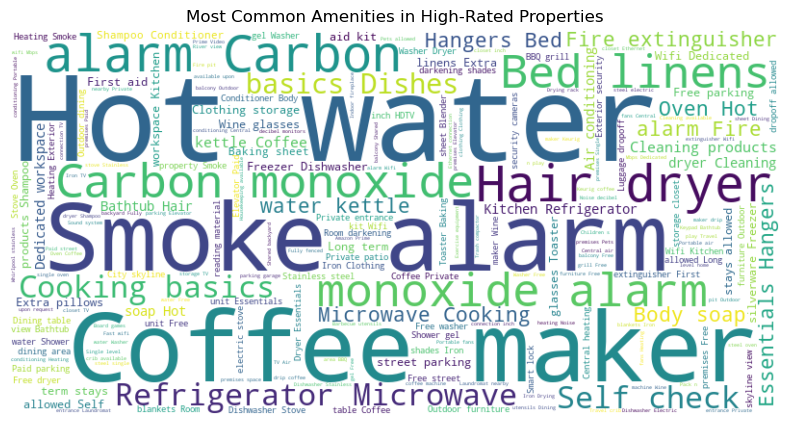

In [46]:
# Extract amenity titles
amenities_list = []

for groups in dp["sections.amenities.seeAllAmenitiesGroups"].dropna():
    try:
        # Convert string representation of a list to an actual list
        if isinstance(groups, str):
            groups = ast.literal_eval(groups)  # Safely converts string to Python list
        
        # Extract amenity titles
        if isinstance(groups, list):
            for group in groups:
                if isinstance(group, dict) and "amenities" in group:
                    for amenity in group["amenities"]:
                        if isinstance(amenity, dict) and "title" in amenity and amenity.get("available", True):
                            amenities_list.append(amenity["title"])
    except (ValueError, SyntaxError):
        continue  # Skip bad entries

# Generate word cloud
if amenities_list:
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(amenities_list))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Amenities in High-Rated Properties")
    plt.show()
else:
    print("⚠️ No valid amenities found for word cloud.")

## 🏙️ Market Gaps: Which Cities Have the Most & Least Competition?  
Understanding **where most Airbnb listings are located** can help new investors find **less competitive areas** and help existing hosts adjust pricing based on demand.  
This analysis will highlight:  
✅ Cities with **high competition** (more listings)  
✅ Cities with **low competition** (great investment potential)  

In [53]:
fig = px.bar(pbp["city"].value_counts().reset_index(), 
             x="index", y="city", 
             title="🏙️ Number of Listings by City", 
             labels={"index": "City", "city": "Number of Listings"},
             color_discrete_sequence=["#636EFA"])  # Blue color theme
fig.show()

## 🔍 What Factors Impact Property Ratings?  
Hosts often wonder **what makes a listing highly rated**. This correlation heatmap will reveal which factors (e.g., **cleanliness, communication, location**) have the **biggest impact** on guest satisfaction.  

In [48]:
# Select relevant rating columns
rating_cols = ["guestSatisfactionOverall", "cleanlinessRating", "communicationRating",
               "locationRating", "accuracyRating", "valueRating"]

corr_matrix = dp[rating_cols].corr()

fig = ff.create_annotated_heatmap(
    z=np.round(corr_matrix.values, 2), 
    x=rating_cols, 
    y=rating_cols, 
    colorscale="Viridis", 
    showscale=True
)

fig.update_layout(title="🔍 Factors Affecting Guest Satisfaction")
fig.show()

## 🛏️ What Property Size Gets the Best Ratings?  
For **new investors**, choosing the right **number of bedrooms** is key.  
We analyze **how bedroom count affects guest ratings** to find the best-performing property sizes.  

In [49]:
fig = px.box(pbp, x="bedrooms", y="avgRating",
             title="🛏️ How Bedroom Count Affects Ratings",
             color="bedrooms")

fig.update_layout(xaxis_title="Number of Bedrooms", yaxis_title="Average Rating")
fig.show()

## ⭐ Do Superhosts Get Better Ratings?  
Hosts who achieve **Superhost status** often gain more trust from guests.  
But does **being a Superhost really improve ratings?** Let’s analyze the data.  

In [51]:
fig = px.box(pbp, x="isSuperhost", y="avgRating", 
             title="⭐ Do Superhosts Get Better Ratings?",
             color="isSuperhost",
             labels={"isSuperhost": "Superhost Status", "avgRating": "Average Rating"})

fig.show()

# 🎯 Final Key Insights  
✅ **Best property type:**  
✅ **Most popular room type:** <br>
✅ **Ideal pricing range for success:** <br>
✅ **Must-have amenities for higher bookings:** <br>
✅ **Best cities for investment:** <br>
✅ **Superhost advantage:** 

### 📢 **Next Steps**  
This analysis provides **valuable insights** for Airbnb hosts & investors. To maximize success:  
🔹 Set **optimal pricing** based on competitive trends  
🔹 Offer **highly-rated amenities** to attract more guests  
🔹 Choose **property types** that ensure better reviews & bookings  

Thank you for reading! 🚀  